In [5]:
from rdkit import rdBase
rdBase.rdkitVersion

'2019.03.2'

In [6]:
import glob
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

import pandas as pd
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path_to_library = '../FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

In [8]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, embedProps=False)
        
    fragments = []
    fingerprints = []
    smiles = []

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        # 2D coordinates
        tmp = AllChem.Compute2DCoords(fixed_frag)
        fragments.append(fixed_frag)
        # smiles for drawing fragment
        smiles.append(Chem.MolToSmiles(fixed_frag))
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
     
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [10:13:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:07] Unexpected error hit on line 56
RDKit ERROR: [10:14:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:07] Unexpected error hit on line 119
RDKit ERROR: [10:14:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Er

RDKit ERROR: [10:14:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:07] Unexpected error hit on line 14468
RDKit ERROR: [10:14:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:07] Unexpected error hit on line 14539
RDKit ERROR: [10:14:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 30585
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 30665
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 46407
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 46466
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 62449
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 62522
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expr

RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 79732
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:08] Unexpected error hit on line 79787
RDKit ERROR: [10:14:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:09] Unexpected error hit on line 97714
RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:09] Unexpected error hit on line 97797
RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:09] Unexpected error hit on line 114432
RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:09] Unexpected error hit on line 114493
RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [10:14:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:10] Unexpected error hit on line 47
RDKit ERROR: [10:14:10] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:10] Unexpected error hit on line 102
RDKit ERROR: [10:14:10] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [10:14:10] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 65
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 129
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range 

RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 16075
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 16168
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 32482
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 32541
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 49145
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 49222
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 66339
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:11] Unexpected error hit on line 66394
RDKit ERROR: [10:14:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 82463
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 82529
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 98825
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 98908
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 115937
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 116009
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 i

RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 133047
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:12] Unexpected error hit on line 133133
RDKit ERROR: [10:14:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [10:14:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:13] Unexpected error hit on line 149658
RDKit ERROR: [10:14:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:13] Unexpected error hit on line 149728
RDKit ERROR: [10:14:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [10:14:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 24 < 24
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:13] Unexpected error hit on line 167376
RDKit ERROR: [10:14:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 24 < 24
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:13] Unexpected error hit on line 167482
RDKit ERROR: [10:14:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [10:14:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:15] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:15] Unexpected error hit on line 56
RDKit ERROR: [10:14:15] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:15] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:15] Unexpected error hit on line 169
RDKit ERROR: [10:14:15] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:15] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Er

RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 17730
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 17807
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 33690
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 33772
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 51415
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 51478
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file

RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 69506
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 69580
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 87569
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:16] Unexpected error hit on line 87630
RDKit ERROR: [10:14:16] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:16] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [10:14:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:17] Unexpected error hit on line 105605
RDKit ERROR: [10:14:17] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:17] Unexpected error hit on line 105688
RDKit ERROR: [10:14:17] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:18] Unexpected error hit on line 2426
RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:18] Unexpected error hit on line 2497
RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file

RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:18] Unexpected error hit on line 17797
RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:18] Unexpected error hit on line 17863
RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:18] Unexpected error hit on line 32886
RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:18] Unexpected error hit on line 32943
RDKit ERROR: [10:14:18] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:19] Unexpected error hit on line 47338
RDKit ERROR: [10:14:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:19] Unexpected error hit on line 47381
RDKit ERROR: [10:14:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [10:14:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:19] Unexpected error hit on line 62546
RDKit ERROR: [10:14:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:14:19] Unexpected error hit on line 62595
RDKit ERROR: [10:14:19] ERROR: moving to the begining of the next molecule
RDKit ERROR: [10:14:19] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

(7138, 14)

In [10]:
df_AP = data[data.subpocket=='AP']
df_FP = data[data.subpocket=='FP']
df_SE = data[data.subpocket=='SE']
df_GA = data[data.subpocket=='GA']
df_B1 = data[data.subpocket=='B1']
df_B2 = data[data.subpocket=='B2']

Functions needed for Clustering:

In [11]:
# Calculate distance matrix for fingerprint list
def Tanimoto_distance_matrix(fp_list):
    fp_list = list(fp_list)
    dissimilarity_matrix = []
    for i in range(1,len(fp_list)):
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i],fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1-x for x in similarities])
    return dissimilarity_matrix

In [12]:
# Input: Fingerprints and a threshold for the clustering
def ClusterFps(fps, cutoff=0.2):
    # Calculate Tanimoto distance matrix
    distance_matr = Tanimoto_distance_matrix(fps)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matr,len(fps),cutoff,isDistData=True)
    return clusters

In [13]:
def analyze_clusters(clusters, subpocket, cutoff):
    
    # Give a short report about the numbers of clusters and their sizes
    num_clust_g1 = len([c for c in clusters if len(c) == 1])
    num_clust_g5 = len([c for c in clusters if len(c) > 5])
    num_clust_g25 = len([c for c in clusters if len(c) > 25])
    num_clust_g100 = len([c for c in clusters if len(c) > 100])

    print(subpocket)
    print("Threshold: ", cutoff)
    print("total # clusters: ", len(clusters))
    print("# clusters with only 1 compound: ", num_clust_g1)
    print("# clusters with >5 compounds: ", num_clust_g5)
    print("# clusters with >25 compounds: ", num_clust_g25)
    print("# clusters with >100 compounds: ", num_clust_g100)

    # Plot the size of the clusters
    fig = plt.figure(1, figsize=(8, 3))
    plt1 = plt.subplot(111)
    plt.axis([0, len(clusters), 0, len(clusters[0])+1])
    plt.xlabel('Cluster index', fontsize=20)
    plt.ylabel('Number of molecules', fontsize=20)
    plt.tick_params(labelsize=16)
    plt.title('Threshold: '+str('%3.1f' %cutoff), fontsize=10)
    plt1.bar(range(1, len(clusters)), [len(c) for c in clusters[:len(clusters)-1]], lw=0)
    plt.show()

    return


## Butina Clustering for each subpocket with different cutoffs:

AP
Threshold:  0.0
total # clusters:  1171
# clusters with only 1 compound:  803
# clusters with >5 compounds:  74
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


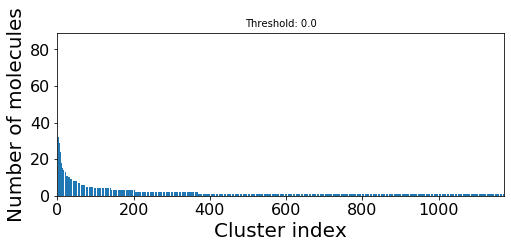

AP
Threshold:  0.1
total # clusters:  1097
# clusters with only 1 compound:  725
# clusters with >5 compounds:  85
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


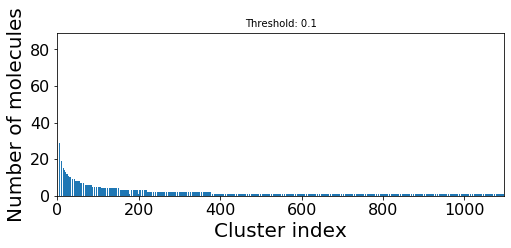

AP
Threshold:  0.2
total # clusters:  903
# clusters with only 1 compound:  555
# clusters with >5 compounds:  92
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


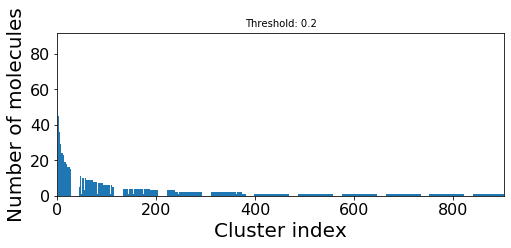

AP
Threshold:  0.30000000000000004
total # clusters:  717
# clusters with only 1 compound:  409
# clusters with >5 compounds:  93
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


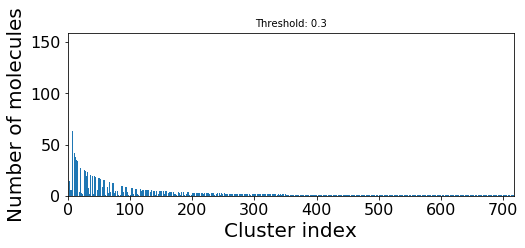

AP
Threshold:  0.4
total # clusters:  557
# clusters with only 1 compound:  298
# clusters with >5 compounds:  96
# clusters with >25 compounds:  17
# clusters with >100 compounds:  1


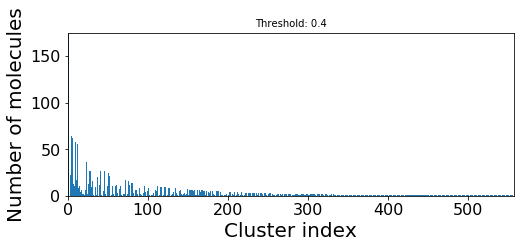

AP
Threshold:  0.5
total # clusters:  386
# clusters with only 1 compound:  177
# clusters with >5 compounds:  83
# clusters with >25 compounds:  17
# clusters with >100 compounds:  4


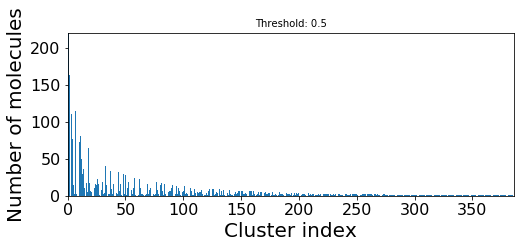

AP
Threshold:  0.6000000000000001
total # clusters:  226
# clusters with only 1 compound:  90
# clusters with >5 compounds:  68
# clusters with >25 compounds:  20
# clusters with >100 compounds:  5


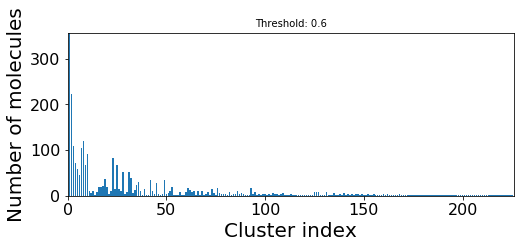

AP
Threshold:  0.7000000000000001
total # clusters:  121
# clusters with only 1 compound:  45
# clusters with >5 compounds:  44
# clusters with >25 compounds:  18
# clusters with >100 compounds:  2


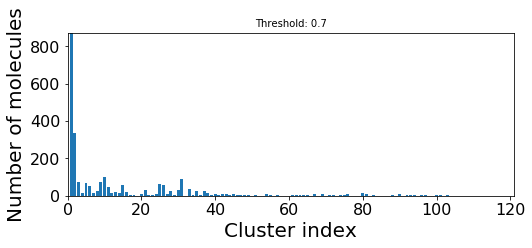

AP
Threshold:  0.8
total # clusters:  43
# clusters with only 1 compound:  11
# clusters with >5 compounds:  16
# clusters with >25 compounds:  8
# clusters with >100 compounds:  4


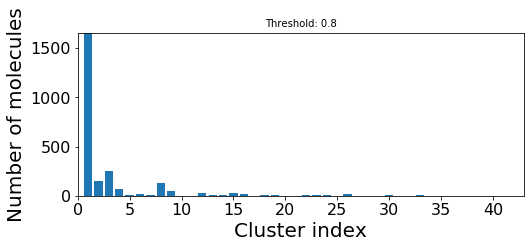

AP
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  2
# clusters with >5 compounds:  7
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


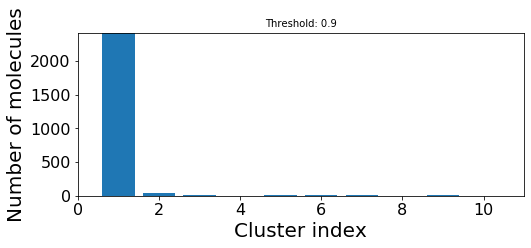

In [14]:
# cluster adenine pocket
fps = df_AP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'AP', cutoff=i)

FP
Threshold:  0.0
total # clusters:  748
# clusters with only 1 compound:  505
# clusters with >5 compounds:  51
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


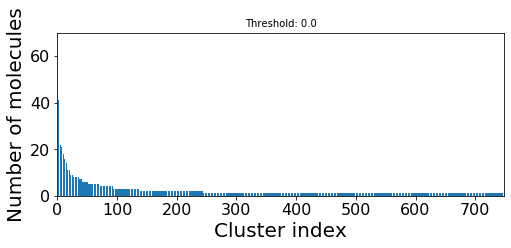

FP
Threshold:  0.1
total # clusters:  724
# clusters with only 1 compound:  475
# clusters with >5 compounds:  52
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


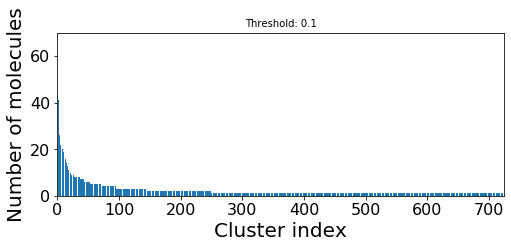

FP
Threshold:  0.2
total # clusters:  662
# clusters with only 1 compound:  410
# clusters with >5 compounds:  60
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


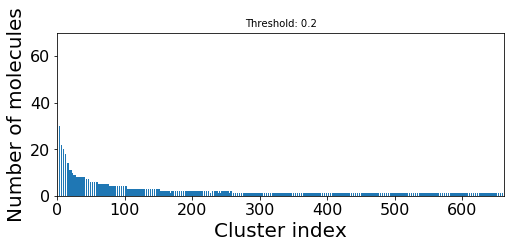

FP
Threshold:  0.30000000000000004
total # clusters:  550
# clusters with only 1 compound:  306
# clusters with >5 compounds:  55
# clusters with >25 compounds:  10
# clusters with >100 compounds:  0


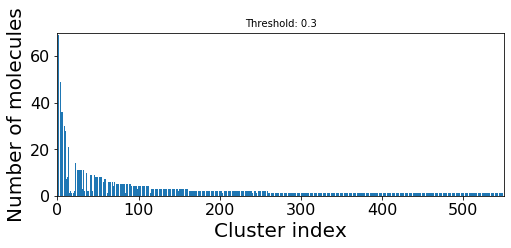

FP
Threshold:  0.4
total # clusters:  424
# clusters with only 1 compound:  209
# clusters with >5 compounds:  66
# clusters with >25 compounds:  9
# clusters with >100 compounds:  0


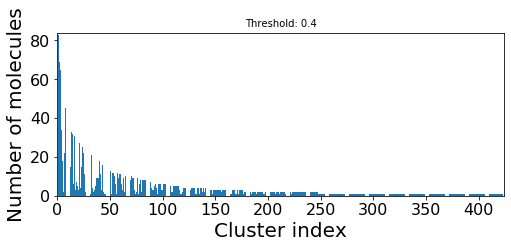

FP
Threshold:  0.5
total # clusters:  298
# clusters with only 1 compound:  132
# clusters with >5 compounds:  61
# clusters with >25 compounds:  11
# clusters with >100 compounds:  2


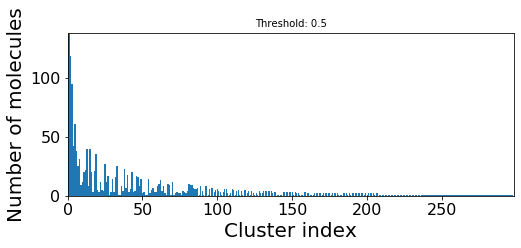

FP
Threshold:  0.6000000000000001
total # clusters:  213
# clusters with only 1 compound:  78
# clusters with >5 compounds:  56
# clusters with >25 compounds:  12
# clusters with >100 compounds:  3


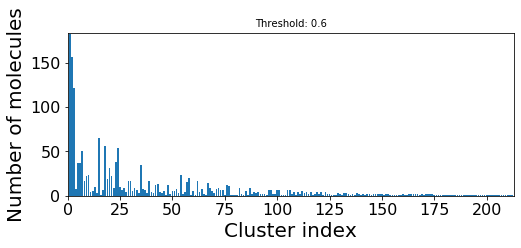

FP
Threshold:  0.7000000000000001
total # clusters:  107
# clusters with only 1 compound:  29
# clusters with >5 compounds:  46
# clusters with >25 compounds:  11
# clusters with >100 compounds:  3


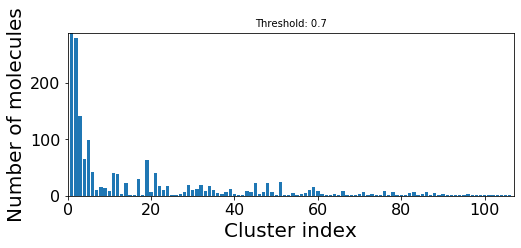

FP
Threshold:  0.8
total # clusters:  48
# clusters with only 1 compound:  9
# clusters with >5 compounds:  26
# clusters with >25 compounds:  6
# clusters with >100 compounds:  5


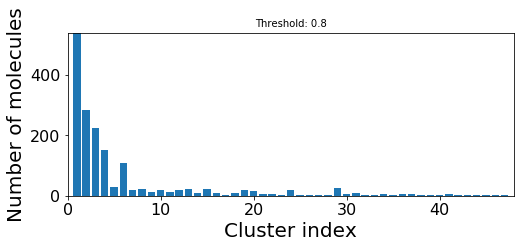

FP
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  9
# clusters with >25 compounds:  4
# clusters with >100 compounds:  2


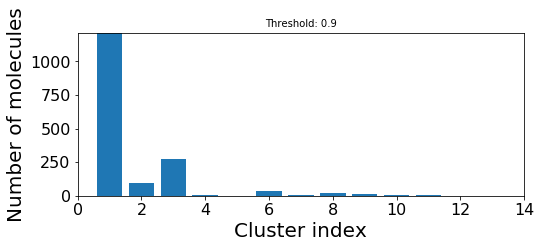

In [15]:
# cluster front pocket
fps = df_FP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'FP', cutoff=i)

SE
Threshold:  0.0
total # clusters:  592
# clusters with only 1 compound:  398
# clusters with >5 compounds:  44
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


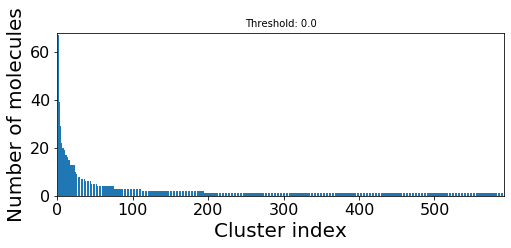

SE
Threshold:  0.1
total # clusters:  562
# clusters with only 1 compound:  371
# clusters with >5 compounds:  44
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


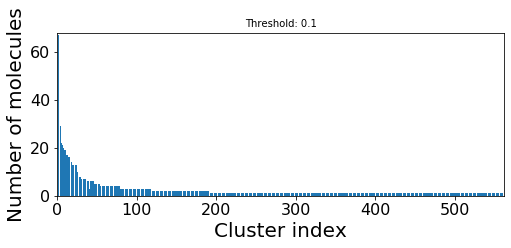

SE
Threshold:  0.2
total # clusters:  483
# clusters with only 1 compound:  302
# clusters with >5 compounds:  48
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


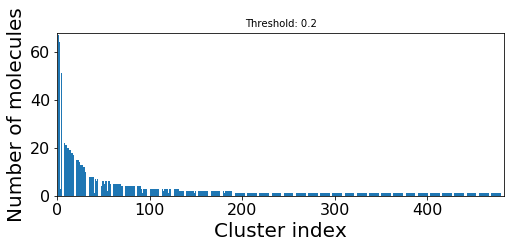

SE
Threshold:  0.30000000000000004
total # clusters:  403
# clusters with only 1 compound:  233
# clusters with >5 compounds:  47
# clusters with >25 compounds:  7
# clusters with >100 compounds:  0


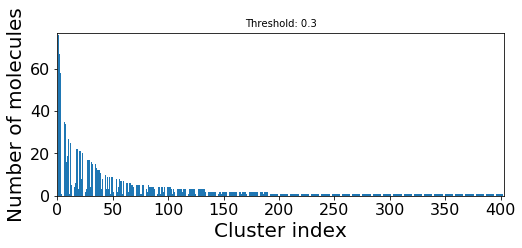

SE
Threshold:  0.4
total # clusters:  302
# clusters with only 1 compound:  156
# clusters with >5 compounds:  47
# clusters with >25 compounds:  13
# clusters with >100 compounds:  0


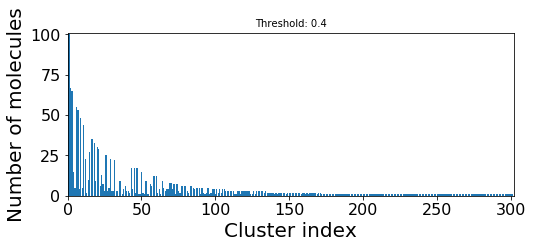

SE
Threshold:  0.5
total # clusters:  212
# clusters with only 1 compound:  90
# clusters with >5 compounds:  41
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


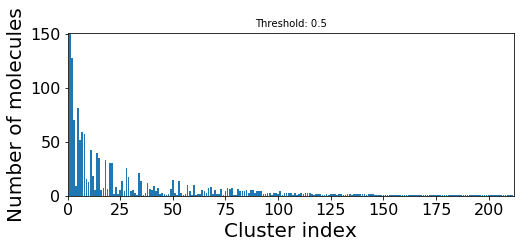

SE
Threshold:  0.6000000000000001
total # clusters:  146
# clusters with only 1 compound:  56
# clusters with >5 compounds:  38
# clusters with >25 compounds:  13
# clusters with >100 compounds:  3


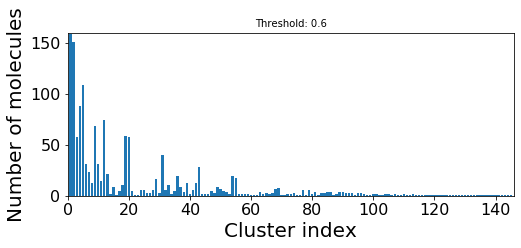

SE
Threshold:  0.7000000000000001
total # clusters:  87
# clusters with only 1 compound:  29
# clusters with >5 compounds:  26
# clusters with >25 compounds:  12
# clusters with >100 compounds:  4


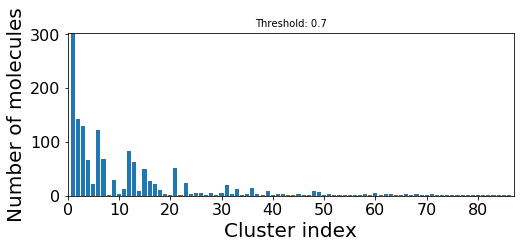

SE
Threshold:  0.8
total # clusters:  39
# clusters with only 1 compound:  7
# clusters with >5 compounds:  17
# clusters with >25 compounds:  9
# clusters with >100 compounds:  4


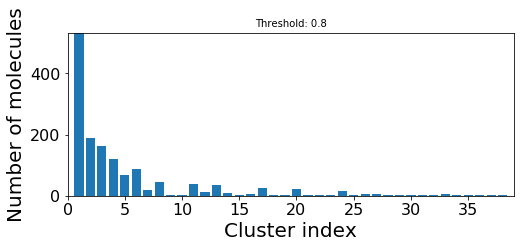

SE
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  6
# clusters with >25 compounds:  6
# clusters with >100 compounds:  1


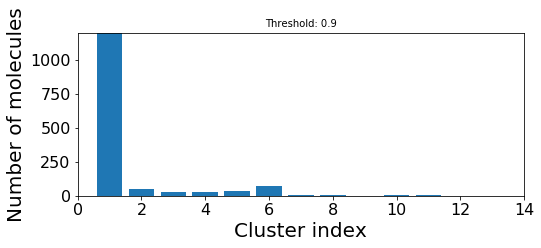

In [16]:
# cluster solvent exposed pocket
fps = df_SE.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'SE', cutoff=i)

GA
Threshold:  0.0
total # clusters:  414
# clusters with only 1 compound:  257
# clusters with >5 compounds:  40
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


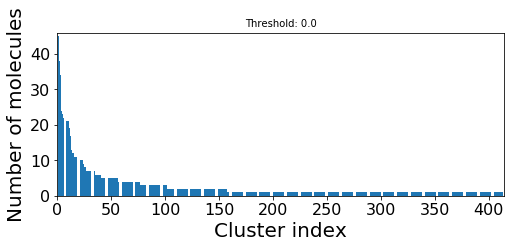

GA
Threshold:  0.1
total # clusters:  404
# clusters with only 1 compound:  243
# clusters with >5 compounds:  41
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


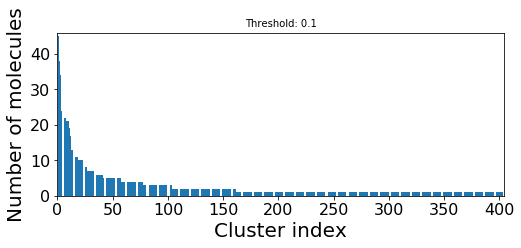

GA
Threshold:  0.2
total # clusters:  351
# clusters with only 1 compound:  201
# clusters with >5 compounds:  47
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


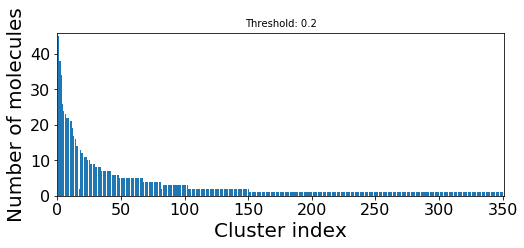

GA
Threshold:  0.30000000000000004
total # clusters:  294
# clusters with only 1 compound:  160
# clusters with >5 compounds:  47
# clusters with >25 compounds:  9
# clusters with >100 compounds:  0


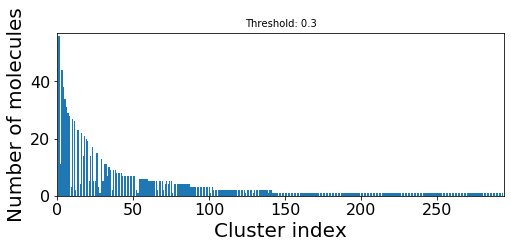

GA
Threshold:  0.4
total # clusters:  241
# clusters with only 1 compound:  121
# clusters with >5 compounds:  49
# clusters with >25 compounds:  7
# clusters with >100 compounds:  0


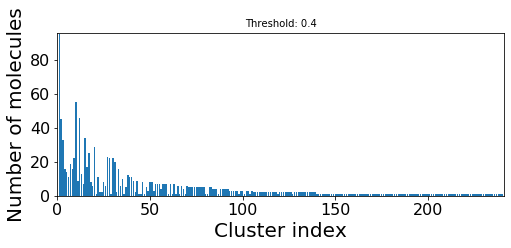

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  86
# clusters with >5 compounds:  36
# clusters with >25 compounds:  10
# clusters with >100 compounds:  1


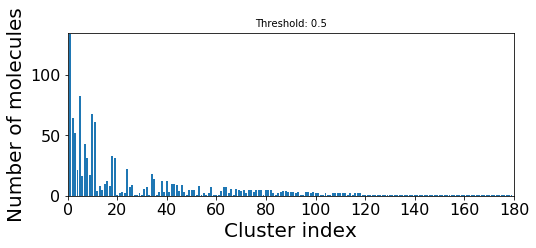

GA
Threshold:  0.6000000000000001
total # clusters:  121
# clusters with only 1 compound:  53
# clusters with >5 compounds:  35
# clusters with >25 compounds:  9
# clusters with >100 compounds:  1


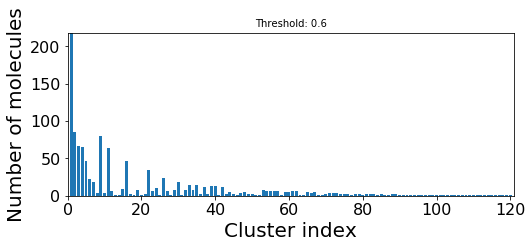

GA
Threshold:  0.7000000000000001
total # clusters:  72
# clusters with only 1 compound:  18
# clusters with >5 compounds:  31
# clusters with >25 compounds:  7
# clusters with >100 compounds:  1


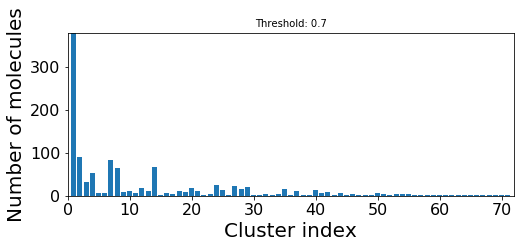

GA
Threshold:  0.8
total # clusters:  35
# clusters with only 1 compound:  5
# clusters with >5 compounds:  21
# clusters with >25 compounds:  7
# clusters with >100 compounds:  3


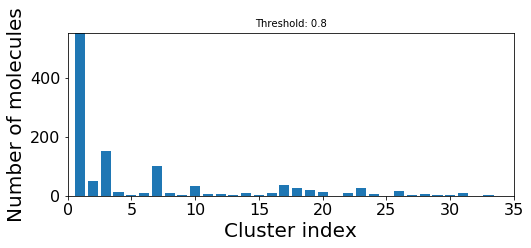

GA
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  1
# clusters with >5 compounds:  10
# clusters with >25 compounds:  3
# clusters with >100 compounds:  1


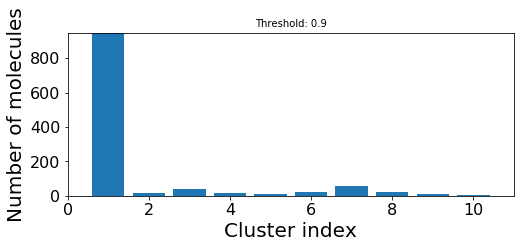

In [17]:
# cluster gate area
fps = df_GA.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'GA', cutoff=i)

B1
Threshold:  0.0
total # clusters:  55
# clusters with only 1 compound:  40
# clusters with >5 compounds:  2
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


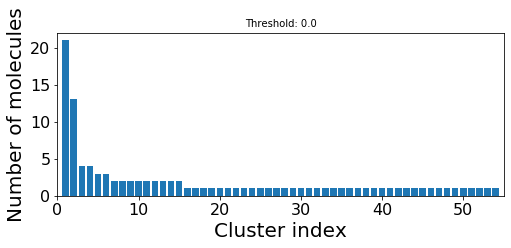

B1
Threshold:  0.1
total # clusters:  55
# clusters with only 1 compound:  40
# clusters with >5 compounds:  2
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


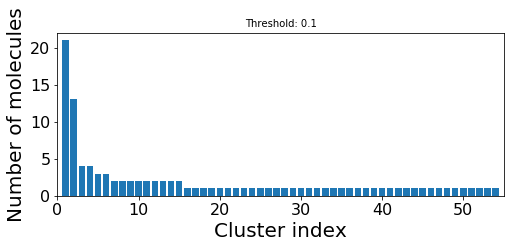

B1
Threshold:  0.2
total # clusters:  53
# clusters with only 1 compound:  37
# clusters with >5 compounds:  2
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


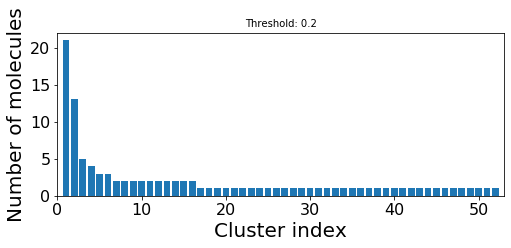

B1
Threshold:  0.30000000000000004
total # clusters:  48
# clusters with only 1 compound:  28
# clusters with >5 compounds:  2
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


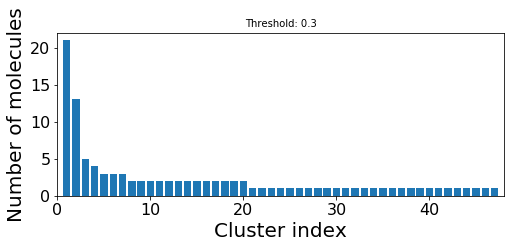

B1
Threshold:  0.4
total # clusters:  39
# clusters with only 1 compound:  22
# clusters with >5 compounds:  4
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


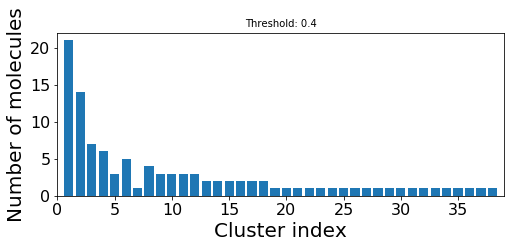

B1
Threshold:  0.5
total # clusters:  32
# clusters with only 1 compound:  16
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


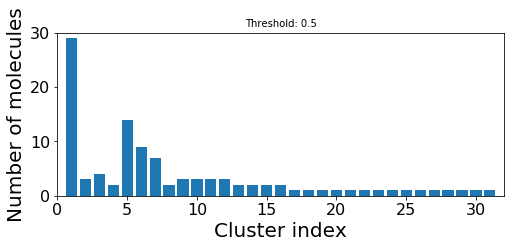

B1
Threshold:  0.6000000000000001
total # clusters:  30
# clusters with only 1 compound:  14
# clusters with >5 compounds:  3
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


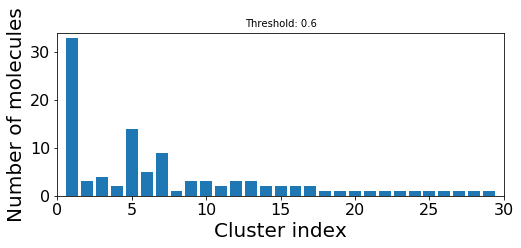

B1
Threshold:  0.7000000000000001
total # clusters:  22
# clusters with only 1 compound:  10
# clusters with >5 compounds:  3
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


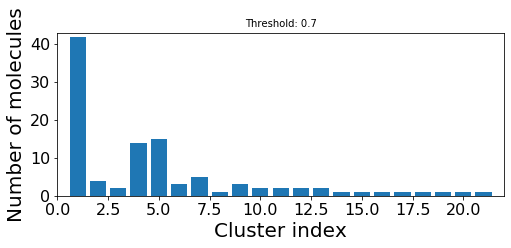

B1
Threshold:  0.8
total # clusters:  18
# clusters with only 1 compound:  6
# clusters with >5 compounds:  3
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


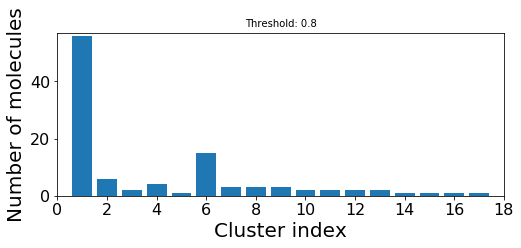

B1
Threshold:  0.9
total # clusters:  8
# clusters with only 1 compound:  3
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


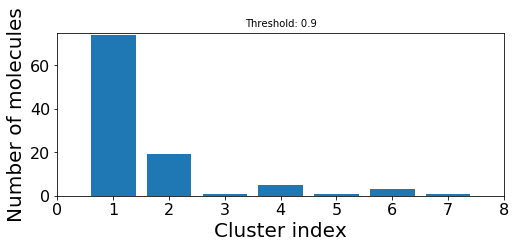

In [18]:
# cluster back pocket I
fps = df_B1.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B1', cutoff=i)

B2
Threshold:  0.0
total # clusters:  121
# clusters with only 1 compound:  83
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


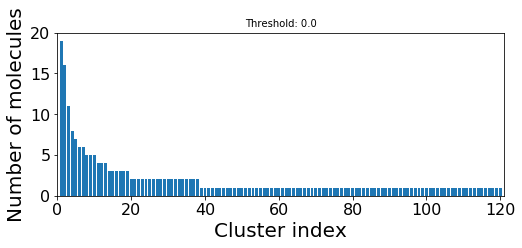

B2
Threshold:  0.1
total # clusters:  118
# clusters with only 1 compound:  79
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


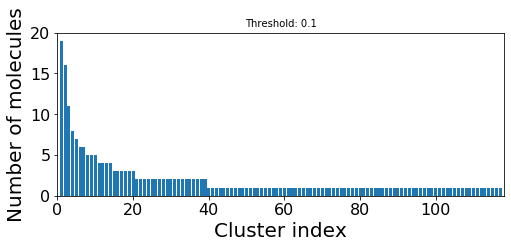

B2
Threshold:  0.2
total # clusters:  112
# clusters with only 1 compound:  70
# clusters with >5 compounds:  8
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


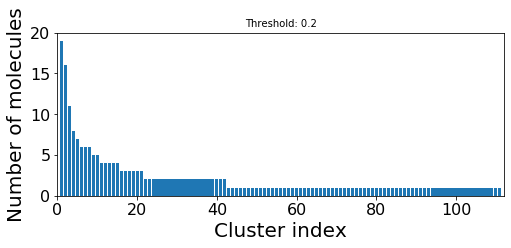

B2
Threshold:  0.30000000000000004
total # clusters:  101
# clusters with only 1 compound:  58
# clusters with >5 compounds:  9
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


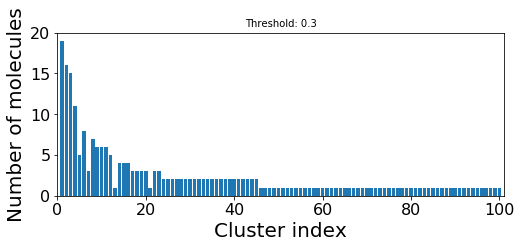

B2
Threshold:  0.4
total # clusters:  86
# clusters with only 1 compound:  41
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


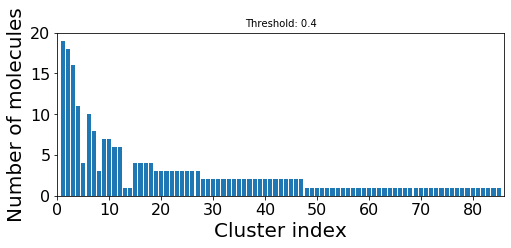

B2
Threshold:  0.5
total # clusters:  70
# clusters with only 1 compound:  28
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


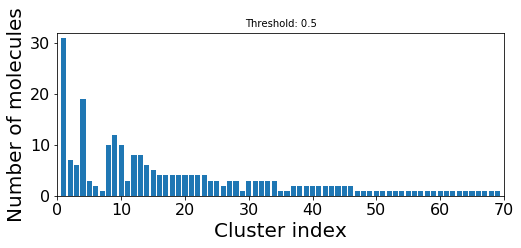

B2
Threshold:  0.6000000000000001
total # clusters:  56
# clusters with only 1 compound:  19
# clusters with >5 compounds:  11
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


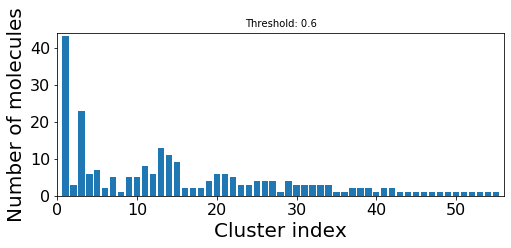

B2
Threshold:  0.7000000000000001
total # clusters:  32
# clusters with only 1 compound:  5
# clusters with >5 compounds:  10
# clusters with >25 compounds:  2
# clusters with >100 compounds:  0


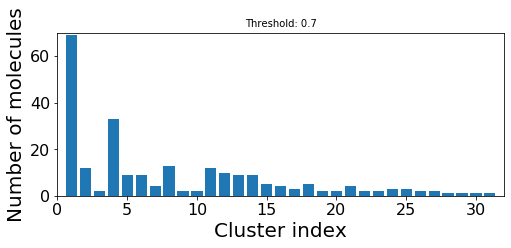

B2
Threshold:  0.8
total # clusters:  23
# clusters with only 1 compound:  7
# clusters with >5 compounds:  7
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


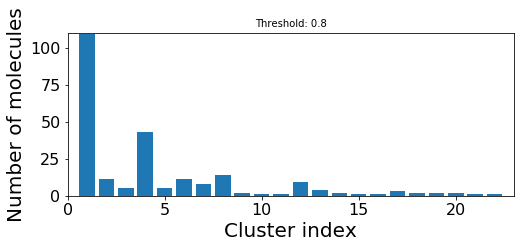

B2
Threshold:  0.9
total # clusters:  9
# clusters with only 1 compound:  2
# clusters with >5 compounds:  6
# clusters with >25 compounds:  1
# clusters with >100 compounds:  1


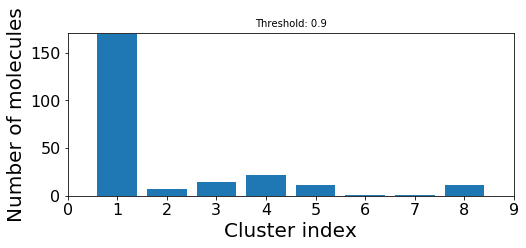

In [19]:
# cluster back pocket II
fps = df_B2.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B2', cutoff=i)

## Investigate clusters:

In [20]:
def principal_components(X):
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)
    return [p[0] for p in X], [p[1] for p in X]

In [21]:
def find_cluster_mcs(cluster, frags, threshold=0.8):
    frags = list(frags)
    mols = [frags[i] for i in cluster]
    mcs = rdFMCS.FindMCS(mols, threshold=threshold)
    substructure = Chem.MolFromSmarts(mcs.smartsString)
    return substructure

In [22]:
def cluster_scatter_plots(x, y, clusters, n_clusters, df, subpocket):
    
    X, Y = [], []
    kinases = list(df.group)
    kinasesXY = []
    cluster_colors = []#np.empty(len(points), dtype=object)
    for p, point in enumerate(x):
        for c, cluster in enumerate(clusters[:n_clusters]):
            if p in cluster:
                cluster_colors.append(c)
                X.append(point)
                Y.append(y[p])
                kinasesXY.append(kinases[p])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(X, Y, c=cluster_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by cluster')

    # find kinase colors
    kinase_set = list(set(kinasesXY))
    kinase_colors = []
    for k, kinase in enumerate(kinasesXY):
        kinase_colors.append(kinase_set.index(kinase))

    plt.subplot(1,2,2)
    plt.scatter(X, Y, c=kinase_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by kinase group')
    plt.show()
    
    return None

## ADENINE POCKET:

AP
Threshold:  0.5
total # clusters:  386
# clusters with only 1 compound:  177
# clusters with >5 compounds:  83
# clusters with >25 compounds:  17
# clusters with >100 compounds:  4


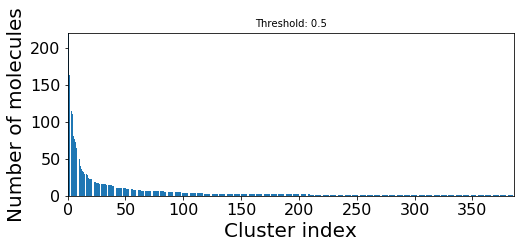

Total number of fragments:  2527


In [23]:
# investigate adenine pocket clusters
cutoff = 0.5
fps = df_AP.fingerprint
frags = df_AP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)
 
analyze_clusters(clusters, 'AP', cutoff)

print('Total number of fragments: ', len(frags))

In [24]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

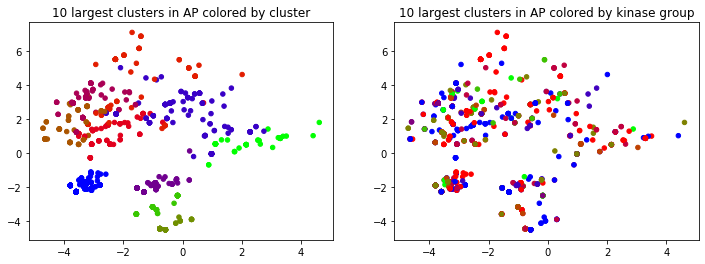

In [25]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_AP, 'AP')

Maximum common substructure per cluster: 


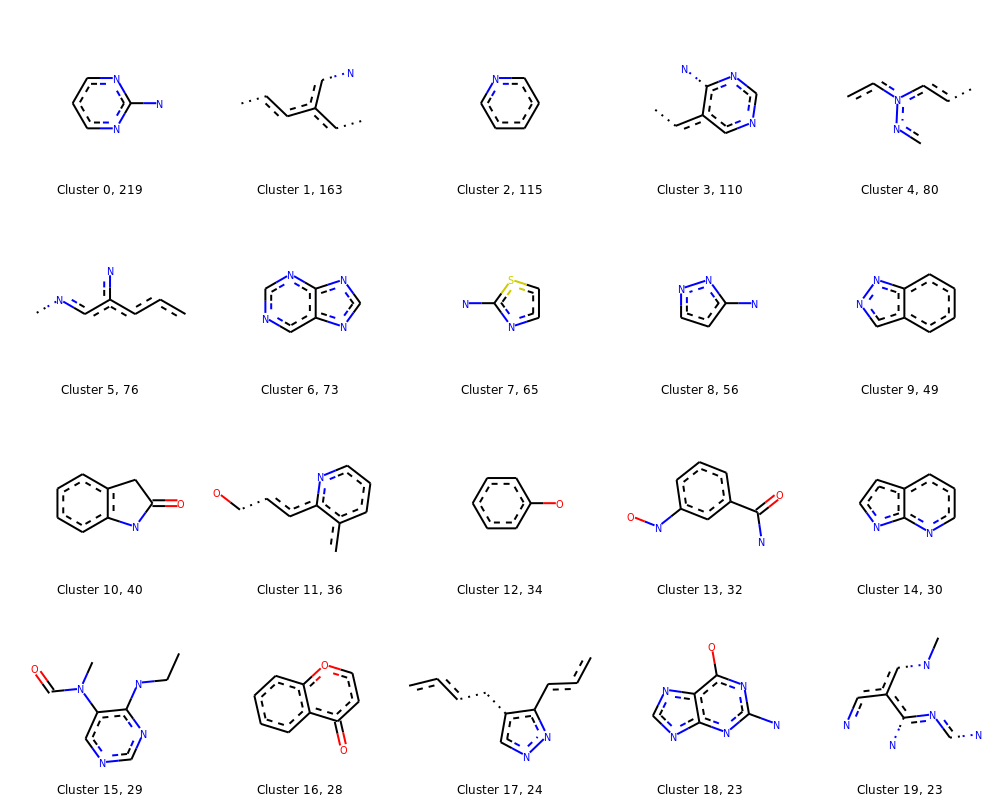

In [26]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

Cluster centroids: 


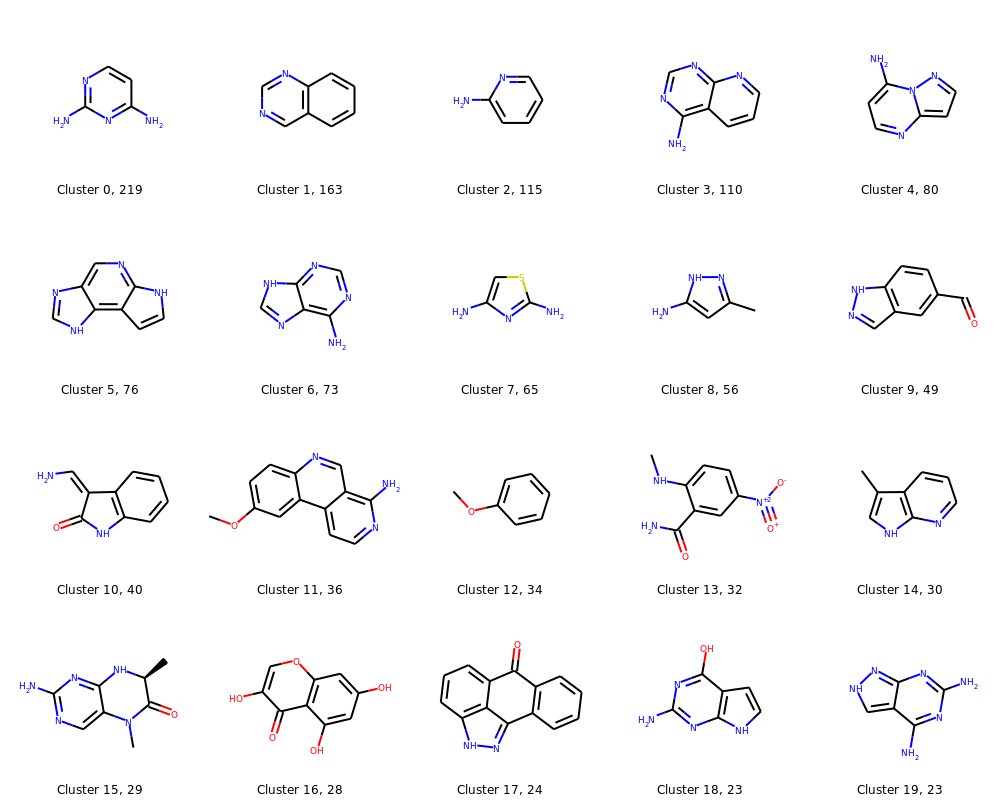

In [27]:
centroids = []
legends = []
# plot cluster centroids of largest clusters
for i, cluster in enumerate(clusters[:20]):
    centroid = list(frags)[cluster[0]]
    centroids.append(centroid)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Cluster centroids: ') 
Draw.MolsToGridImage(centroids, legends=legends, molsPerRow=5)

In [28]:
# kinases of first clusters for KinMap
kinases = list(df_AP.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/AP_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/AP_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster20_kinases = [kinases[i] for i in clusters[20]]
with open('./KinMap/AP_20.txt', 'w') as f:
    for k in cluster20_kinases:
        f.write(k)
        f.write('\n')
cluster39_kinases = [kinases[i] for i in clusters[39]]
with open('./KinMap/AP_39.txt', 'w') as f:
    for k in cluster39_kinases:
        f.write(k)
        f.write('\n')
cluster46_kinases = [kinases[i] for i in clusters[46]]
with open('./KinMap/AP_46.txt', 'w') as f:
    for k in cluster46_kinases:
        f.write(k)
        f.write('\n')

## FRONT POCKET:

FP
Threshold:  0.5
total # clusters:  298
# clusters with only 1 compound:  132
# clusters with >5 compounds:  61
# clusters with >25 compounds:  11
# clusters with >100 compounds:  2


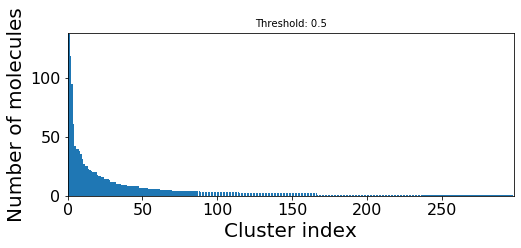

Total number of fragments:  1677


In [29]:
# investigate front pocket
cutoff = 0.5
fps = df_FP.fingerprint
frags = df_FP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'FP', cutoff)

print('Total number of fragments: ', len(frags))

In [30]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

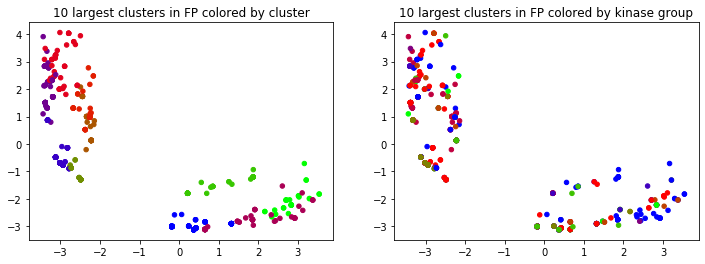

In [31]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_FP, 'FP')

Maximum common substructure per cluster: 


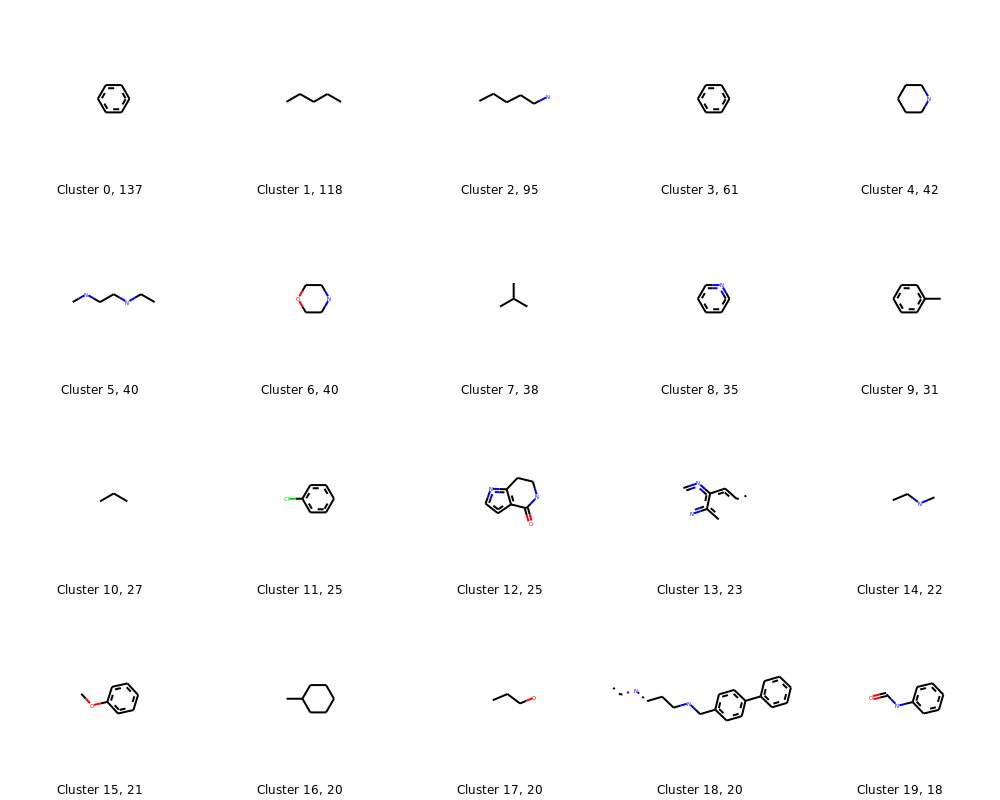

In [32]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

Cluster centroids: 


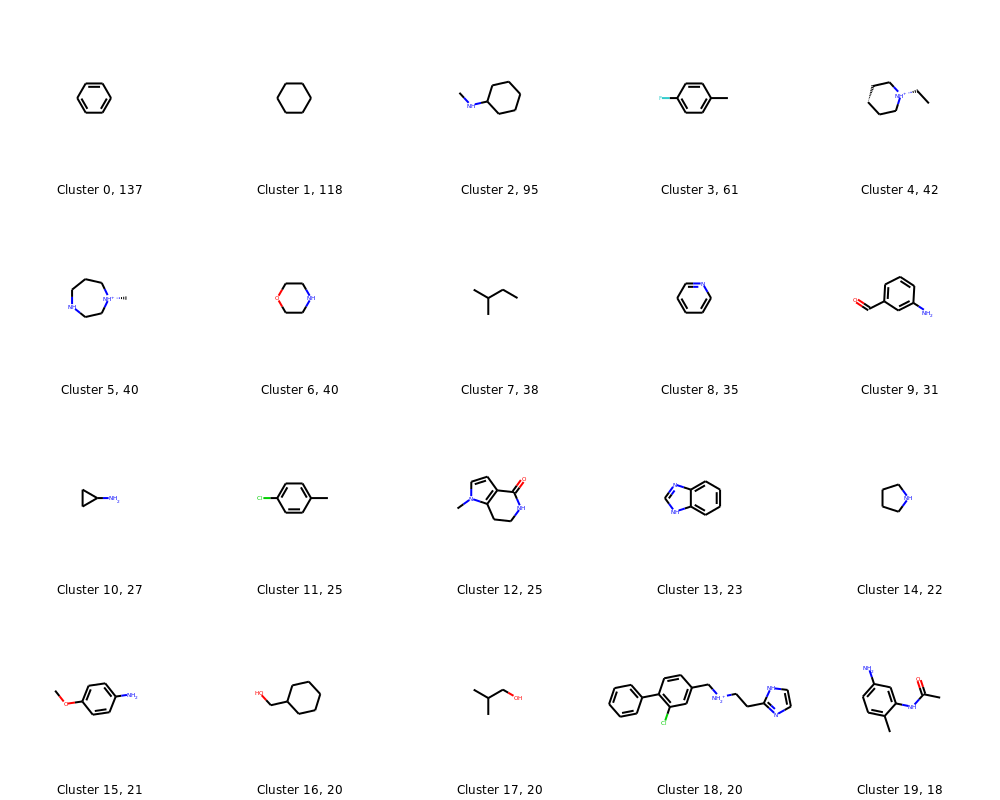

In [33]:
centroids = []
legends = []
# plot cluster centroids of largest clusters
for i, cluster in enumerate(clusters[:20]):
    centroid = list(frags)[cluster[0]]
    centroids.append(centroid)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Cluster centroids: ') 
Draw.MolsToGridImage(centroids, legends=legends, molsPerRow=5)

In [34]:
# kinases of first clusters for KinMap
kinases = list(df_FP.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/FP_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/FP_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster13_kinases = [kinases[i] for i in clusters[13]]
with open('./KinMap/FP_13.txt', 'w') as f:
    for k in cluster13_kinases:
        f.write(k)
        f.write('\n')

## SE POCKET:

SE
Threshold:  0.5
total # clusters:  212
# clusters with only 1 compound:  90
# clusters with >5 compounds:  41
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


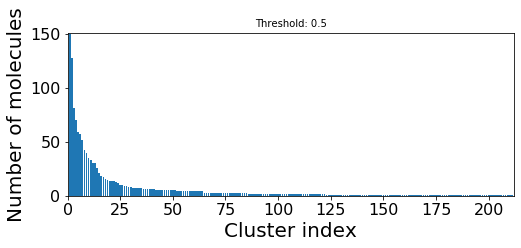

Total number of fragments:  1441


In [35]:
# investigate solvent exposed pocket
cutoff = 0.5
fps = df_SE.fingerprint
frags = df_SE.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'SE', cutoff)

print('Total number of fragments: ', len(frags))

In [36]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

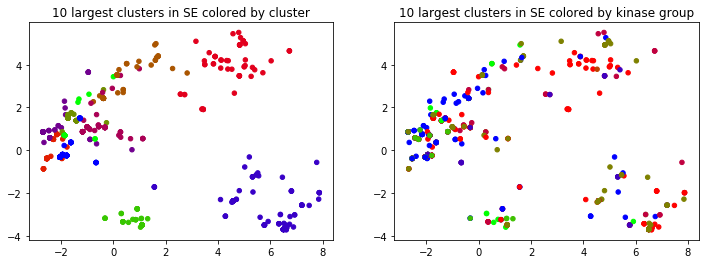

In [37]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_SE, 'SE')

Maximum common substructure per cluster: 


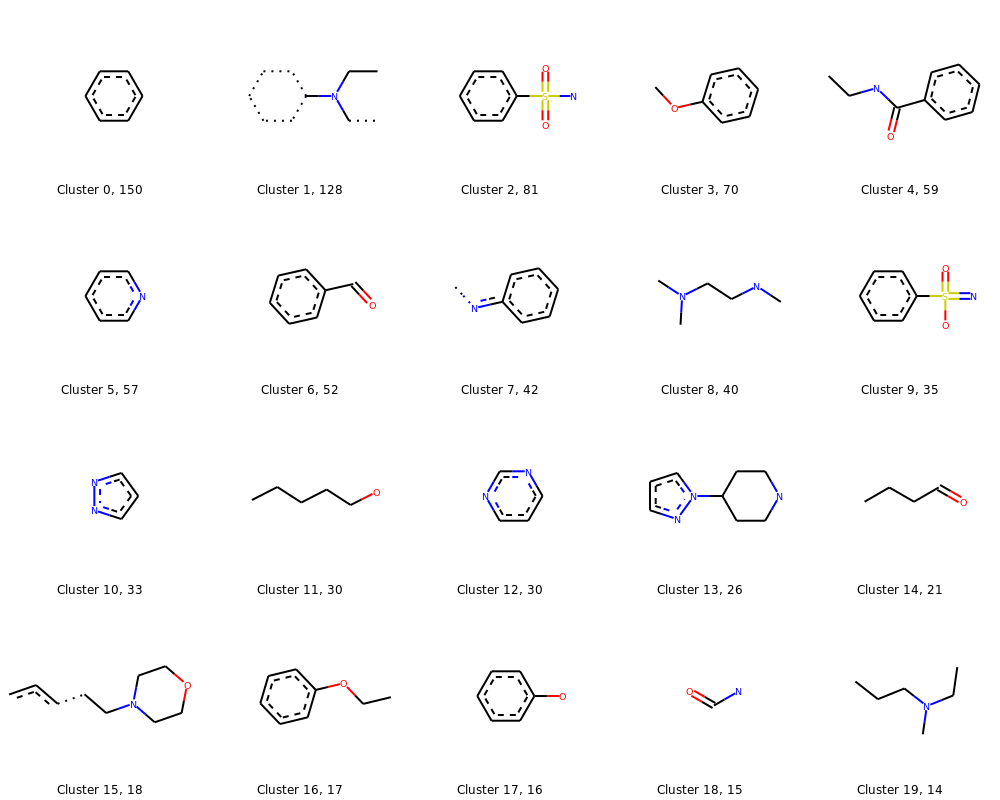

In [38]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

Cluster centroids: 


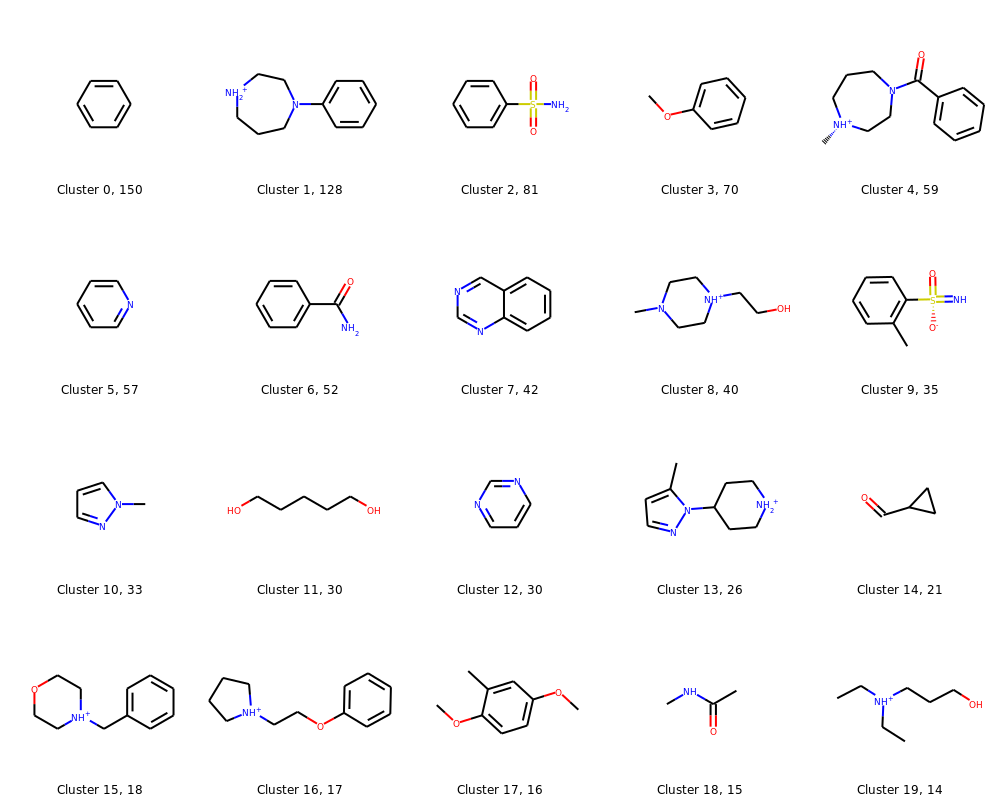

In [39]:
centroids = []
legends = []
# plot cluster centroids of largest clusters
for i, cluster in enumerate(clusters[:20]):
    centroid = list(frags)[cluster[0]]
    centroids.append(centroid)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Cluster centroids: ') 
Draw.MolsToGridImage(centroids, legends=legends, molsPerRow=5)

## GATE AREA:

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  86
# clusters with >5 compounds:  36
# clusters with >25 compounds:  10
# clusters with >100 compounds:  1


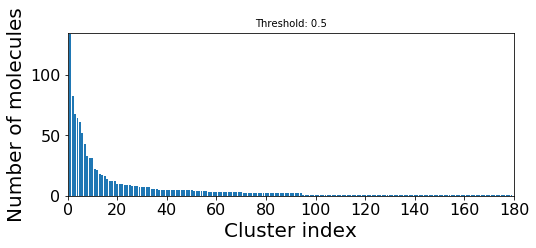

Total number of fragments:  1148


In [40]:
# investigate gate area
cutoff = 0.5
fps = df_GA.fingerprint
frags = df_GA.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'GA', cutoff)
print('Total number of fragments: ', len(frags))

In [41]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

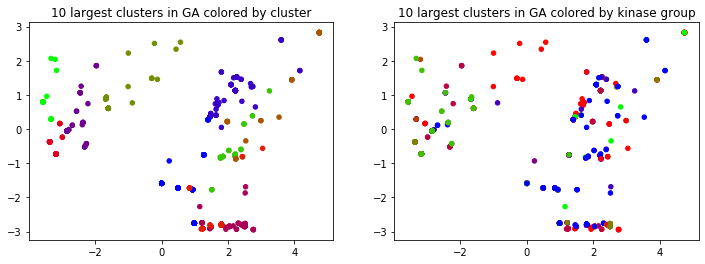

In [42]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_GA, 'GA')

Maximum common substructure per cluster: 


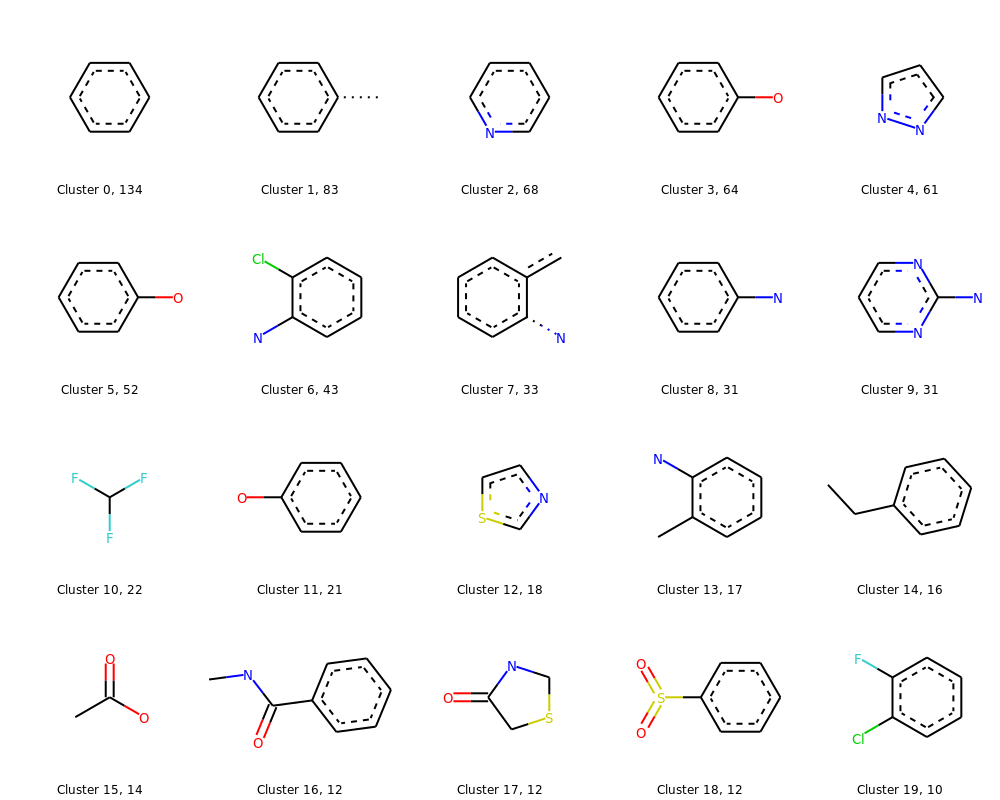

In [43]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

Cluster centroids: 


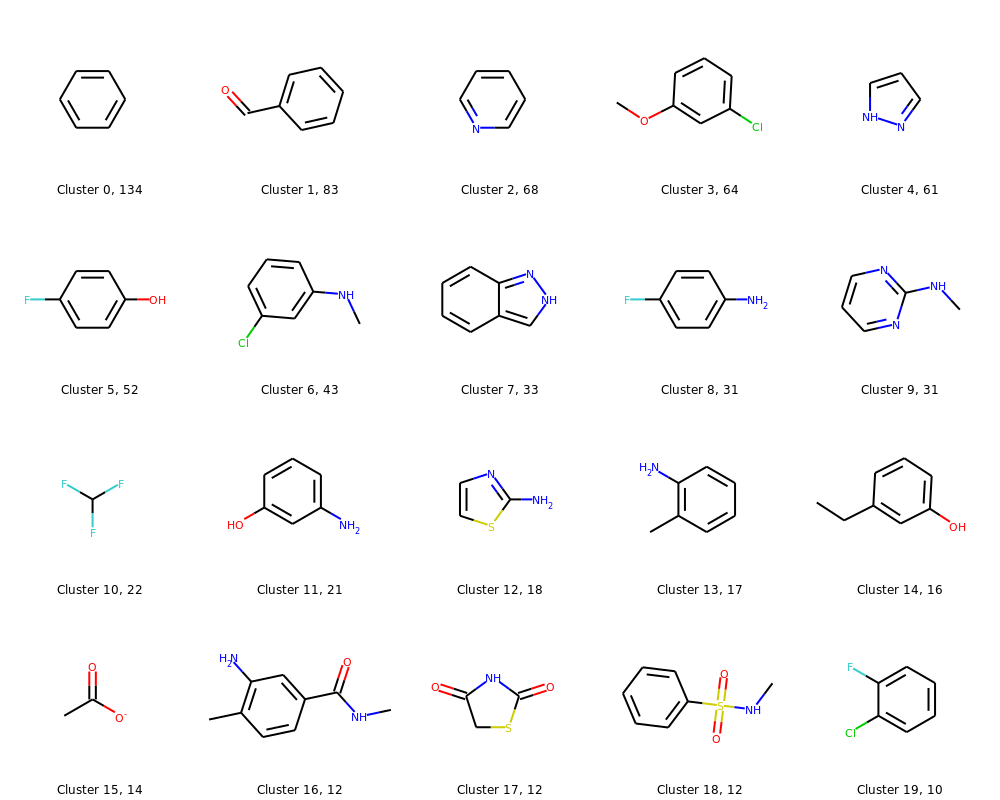

In [44]:
centroids = []
legends = []
# plot cluster centroids of largest clusters
for i, cluster in enumerate(clusters[:20]):
    centroid = list(frags)[cluster[0]]
    centroids.append(centroid)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Cluster centroids: ') 
Draw.MolsToGridImage(centroids, legends=legends, molsPerRow=5)

In [45]:
# kinases of first clusters for KinMap
kinases = list(df_GA.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/GA_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/GA_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster6_kinases = [kinases[i] for i in clusters[6]]
with open('./KinMap/GA_6.txt', 'w') as f:
    for k in cluster6_kinases:
        f.write(k)
        f.write('\n')
cluster11_kinases = [kinases[i] for i in clusters[11]]
with open('./KinMap/GA_11.txt', 'w') as f:
    for k in cluster11_kinases:
        f.write(k)
        f.write('\n')
cluster19_kinases = [kinases[i] for i in clusters[19]]
with open('./KinMap/GA_19.txt', 'w') as f:
    for k in cluster19_kinases:
        f.write(k)
        f.write('\n')

## BACK POCKET I

B1
Threshold:  0.5
total # clusters:  32
# clusters with only 1 compound:  16
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


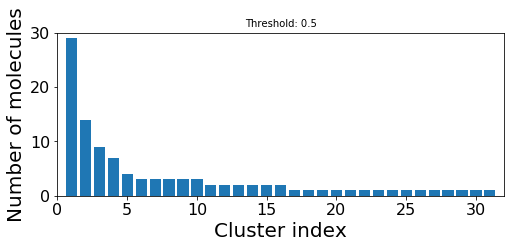

Total number of fragments:  239


In [46]:
# investigate back pocket I
cutoff = 0.5
fps = df_B1.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B1', cutoff)
print('Total number of fragments: ', len(frags))

In [47]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

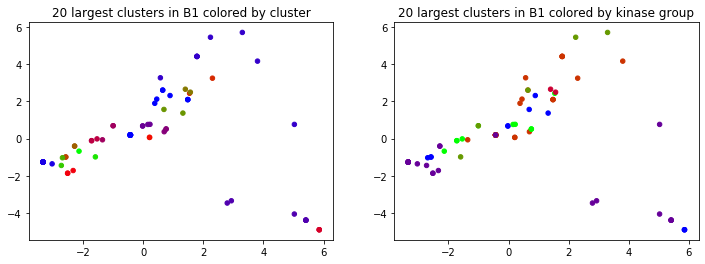

In [48]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B1, 'B1')

Maximum common substructure per cluster: 


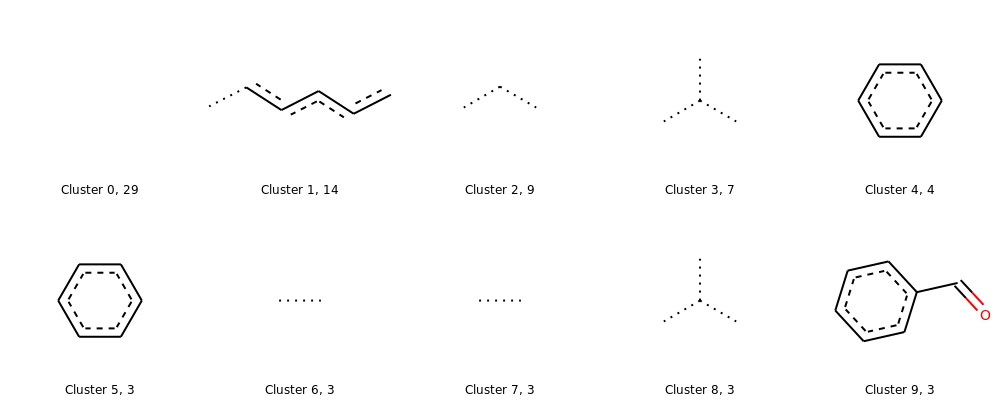

In [49]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags, threshold=0.7) # different threshold than usual in order to see sth!
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

Cluster centroids: 


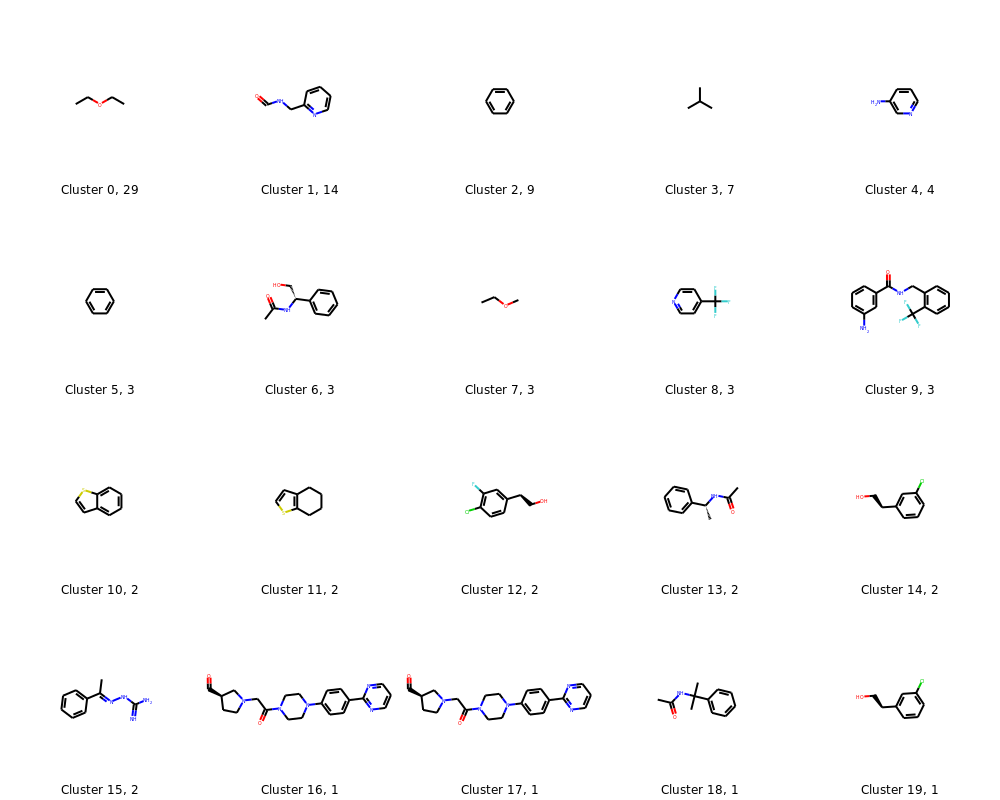

In [50]:
centroids = []
legends = []
# plot cluster centroids of largest clusters
for i, cluster in enumerate(clusters[:20]):
    centroid = list(frags)[cluster[0]]
    centroids.append(centroid)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Cluster centroids: ') 
Draw.MolsToGridImage(centroids, legends=legends, molsPerRow=5)

## BACK POCKET II

B2
Threshold:  0.5
total # clusters:  70
# clusters with only 1 compound:  28
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


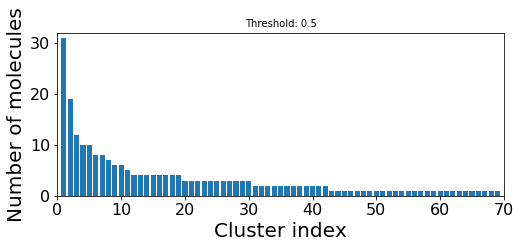

Total number of fragments:  239


In [51]:
# investigate back pocket II
cutoff = 0.5
fps = df_B2.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B2', cutoff)
print('Total number of fragments: ', len(frags))

In [52]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

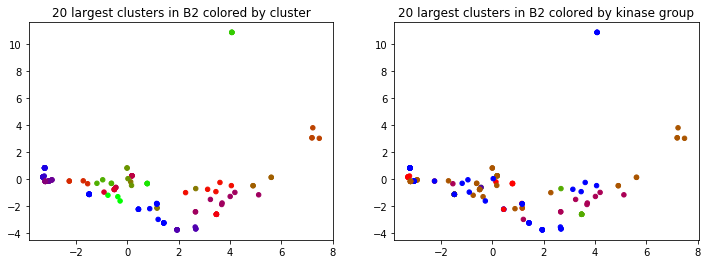

In [53]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B2, 'B2')

Maximum common substructure per cluster: 


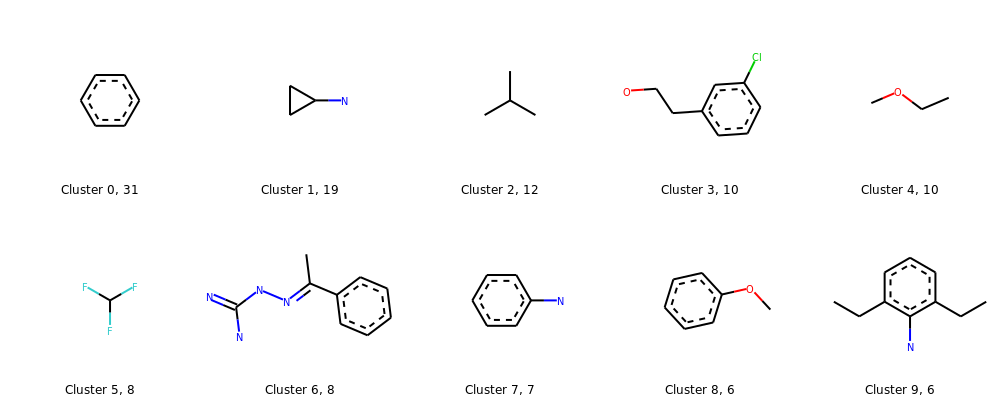

In [54]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

Cluster centroids: 


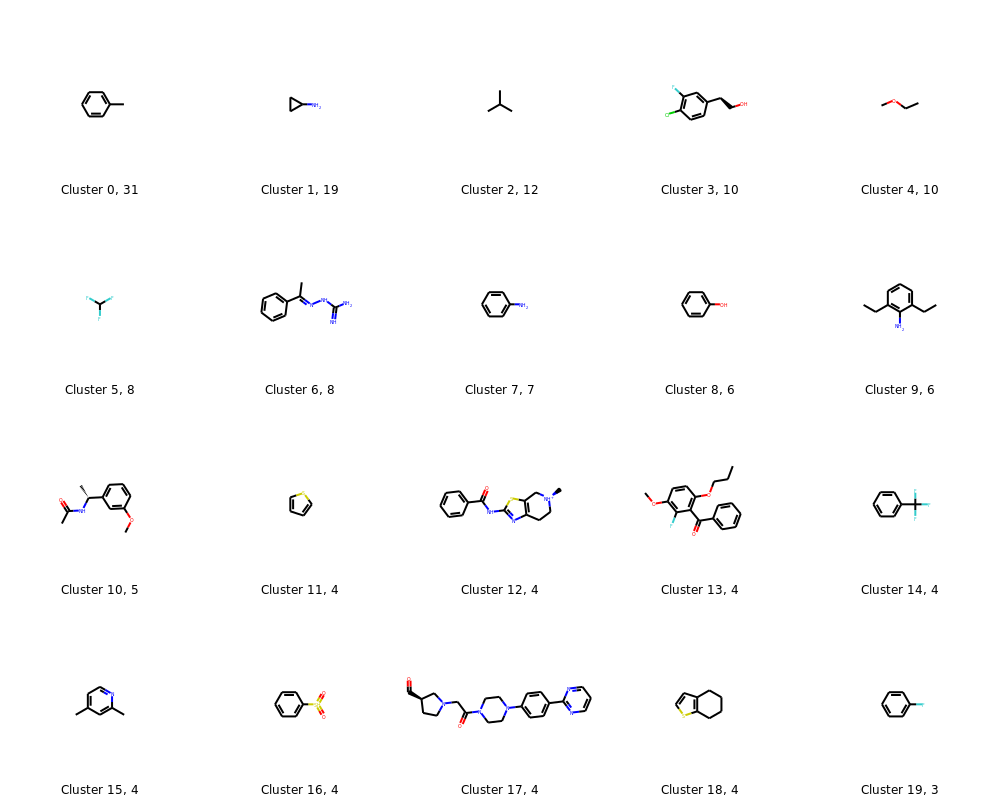

In [55]:
centroids = []
legends = []
# plot cluster centroids of largest clusters
for i, cluster in enumerate(clusters[:20]):
    centroid = list(frags)[cluster[0]]
    centroids.append(centroid)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Cluster centroids: ') 
Draw.MolsToGridImage(centroids, legends=legends, molsPerRow=5)

In [56]:
# kinases of first clusters for KinMap
kinases = list(df_B2.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/B2_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/B2_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster3_kinases = [kinases[i] for i in clusters[3]]
with open('./KinMap/B2_3.txt', 'w') as f:
    for k in cluster3_kinases:
        f.write(k)
        f.write('\n')